# **90 Different Animals Dataset prediction**

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

100% 656M/656M [00:17<00:00, 37.9MB/s]
100% 656M/656M [00:17<00:00, 39.3MB/s]


In [5]:
!unzip /content/animal-image-dataset-90-different-animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

# **1-Data Augmentation**

In [ ]:
!pip install tensorflow keras numpy matplotlib


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


dataset_dir = "animals/animals"


datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

# Load the dataset using flow_from_directory method
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'
)

Found 5400 images belonging to 90 classes.


# **2-CNN Model Building**

In [8]:

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(90, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# *Train the model*

Epoch 1/10
169/169 [==============================] - 93s 554ms/step - loss: 1.9972 - accuracy: 0.4693
Epoch 2/10
169/169 [==============================] - 95s 560ms/step - loss: 1.9614 - accuracy: 0.4730
Epoch 3/10
169/169 [==============================] - 92s 545ms/step - loss: 1.9960 - accuracy: 0.4650
Epoch 4/10
169/169 [==============================] - 90s 532ms/step - loss: 1.9713 - accuracy: 0.4646
Epoch 5/10
169/169 [==============================] - 91s 536ms/step - loss: 1.9237 - accuracy: 0.4776
Epoch 6/10
169/169 [==============================] - 89s 527ms/step - loss: 1.9758 - accuracy: 0.4654
Epoch 7/10
169/169 [==============================] - 90s 536ms/step - loss: 1.9257 - accuracy: 0.4781
Epoch 8/10
169/169 [==============================] - 92s 542ms/step - loss: 1.9698 - accuracy: 0.4698
Epoch 9/10
169/169 [==============================] - 89s 529ms/step - loss: 2.0149 - accuracy: 0.4648
Epoch 10/10
169/169 [==============================] - 92s 540ms/step - l

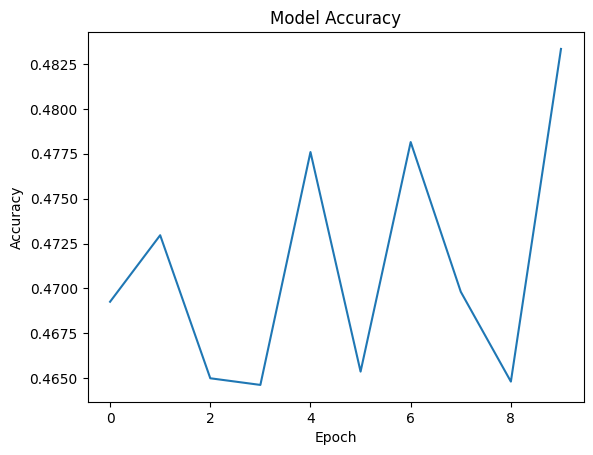

In [61]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(train_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [62]:
model.save('animal_prediction.h5')

In [57]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('animal_prediction.h5')

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# **3-Test the Model**

In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np


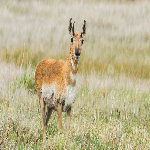

In [33]:

# Testing 1

img = image.load_img('/content/animals/animals/antelope/02f4b3be2d.jpg',target_size =(150,150))
img

In [34]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['antelope','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshoppe','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin','pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper','seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']
op[pred]

1/1 [==============================] - 0s 23ms/step


'antelope'

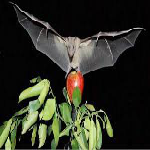

In [35]:
# Testing 2

img = image.load_img('/content/animals/animals/bat/003bd60fa9.jpg',target_size =(150,150))
img

In [36]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['antelope','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshoppe','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin','pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper','seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']
op[pred]

1/1 [==============================] - 0s 19ms/step


'bat'

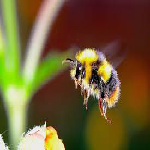

In [53]:
# Testing 3

img = image.load_img('/content/animals/animals/bee/0d562e4829.jpg',target_size =(150,150))
img

In [54]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['antelope','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshoppe','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin','pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper','seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']
op[pred]

1/1 [==============================] - 0s 86ms/step


'bee'

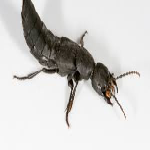

In [43]:
# Testing 4

img = image.load_img('/content/animals/animals/beetle/02b34c63a2.jpg',target_size =(150,150))
img

In [44]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['antelope','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshoppe','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin','pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper','seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']
op[pred]

1/1 [==============================] - 0s 18ms/step


'beetle'

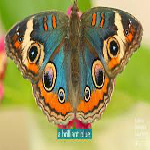

In [45]:
# Testing 5

img = image.load_img('/content/animals/animals/butterfly/016caf0681.jpg',target_size =(150,150))
img

In [46]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['antelope','badger','bat','bear','bee','beetle','bison','boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose','gorilla','grasshoppe','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird','hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin','pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper','seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']
op[pred]

1/1 [==============================] - 0s 20ms/step


'butterfly'